In [1]:
import pickle
import matplotlib.pyplot as plt

from Week2_Rydberg_Atoms.draw_graph import draw_graph, draw_multi_graph
from Week2_Rydberg_Atoms.utils import int_to_bin, sanity_check


In [2]:
with open('./simulations/city_example_QA.txt', 'rb') as of:
    simulation_result = pickle.load(of)
with open('./city_example_dataset.txt', 'rb') as of:
    city_graph = pickle.load(of)

In [3]:
#for dataset_name in simulation_result:
dataset_name = 'Canada, Near Toronto > 50,000'
result_by_dt = simulation_result[dataset_name]
graph = city_graph[dataset_name]['graph']
radius = city_graph[dataset_name]['radius']
num_cities = len(graph)

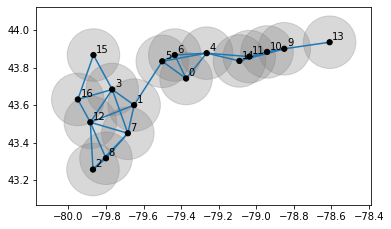

In [4]:
draw_graph(graph, radius=radius)

QA with dt = 0.1


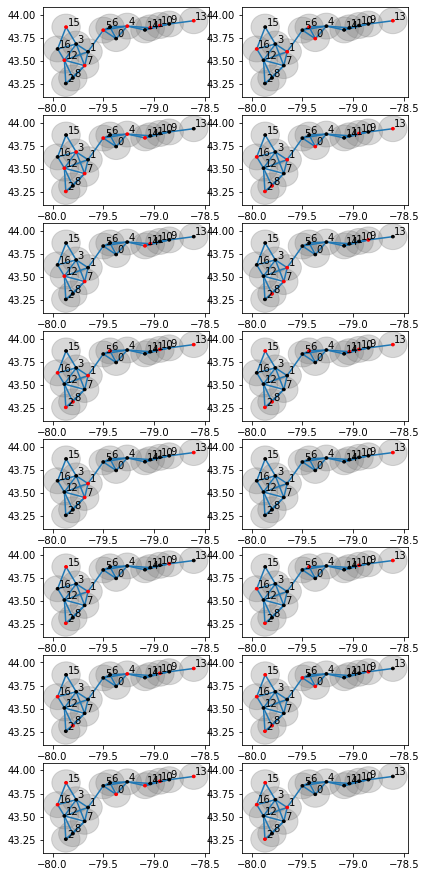

QA with dt = 0.025


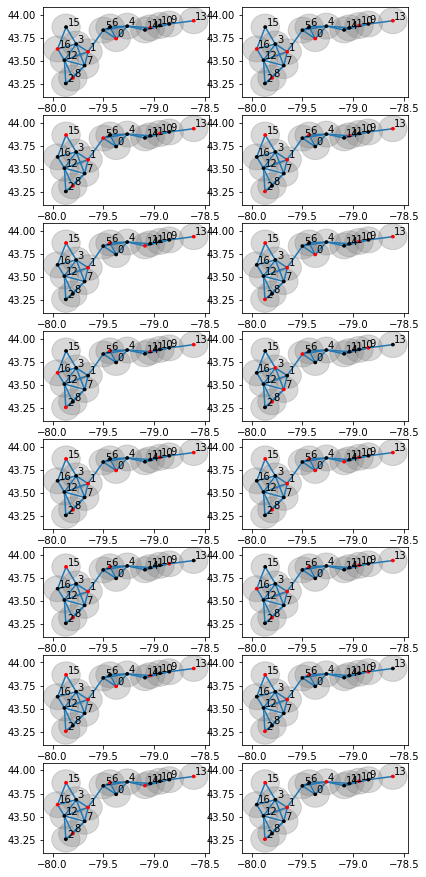

QA with dt = 0.01


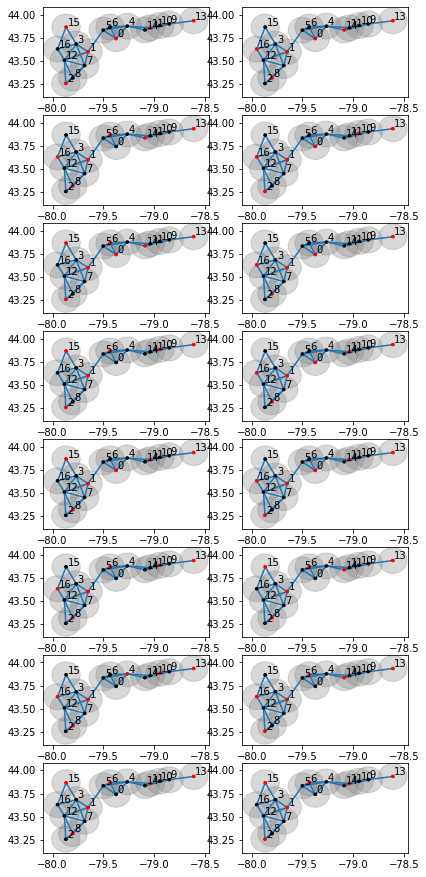

QA with dt = 0.0025


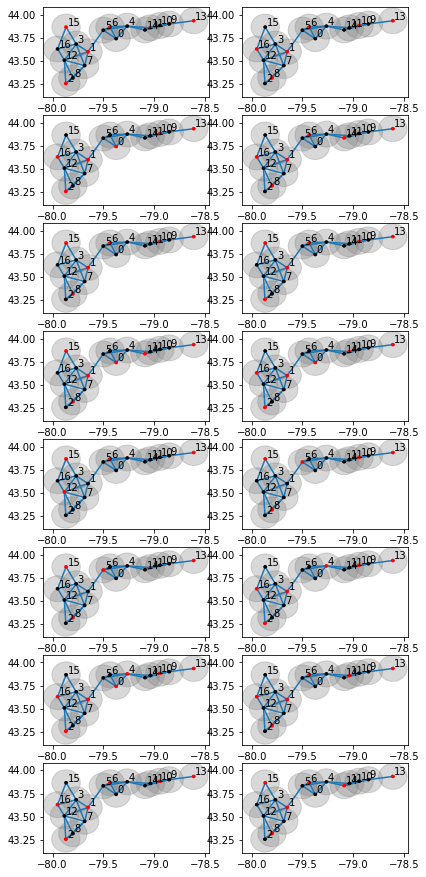

QA with dt = 0.001


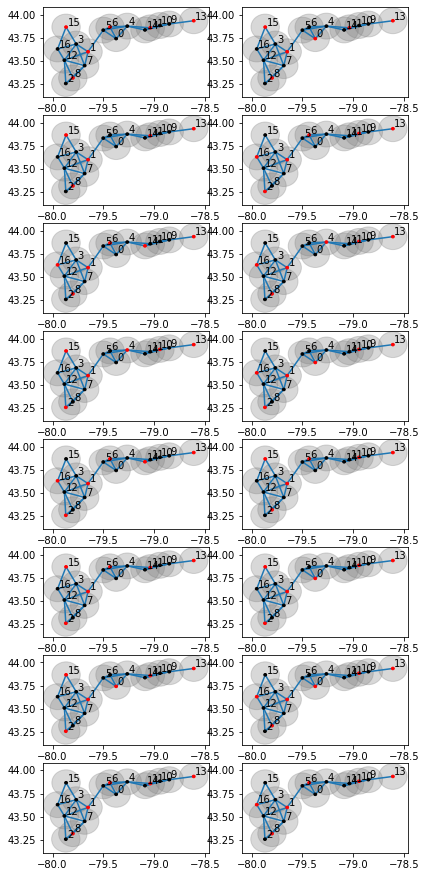

QA with dt = 0.00025


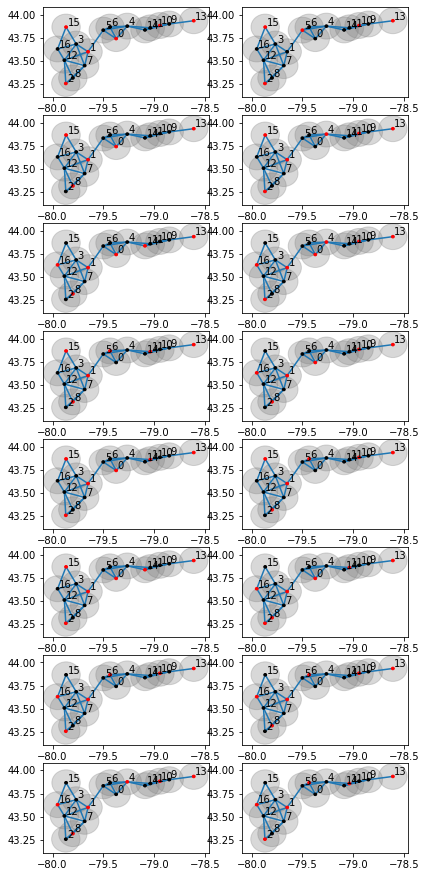

QA with dt = 0.0001


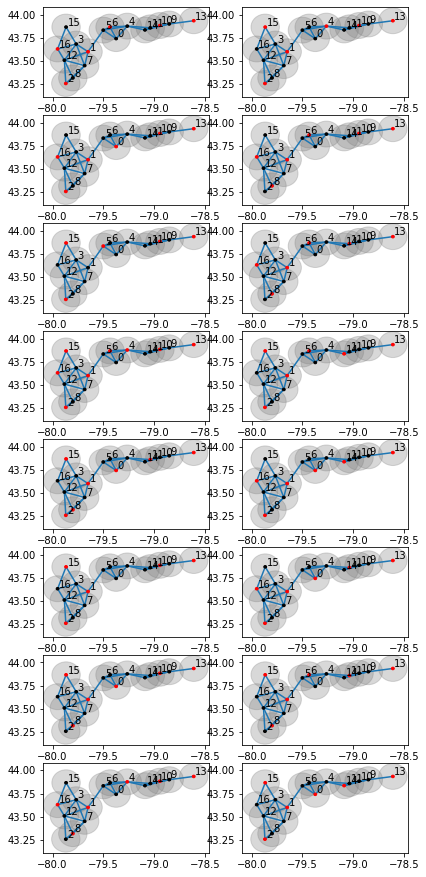

In [5]:
for dt in result_by_dt:
    print(f"QA with dt = {dt}")
    occurrence = result_by_dt[dt]['occurrence']
    ans_bool = [int_to_bin(a, num_cities) for a in occurrence][:16]
    draw_multi_graph(graph,
                     radius=radius,
                     answer_list=ans_bool)

In [6]:
max_finding = 0
violated = [0 for _ in range(len(result_by_dt))]
suboptimal = [0 for _ in range(len(result_by_dt))]
solution = [0 for _ in range(len(result_by_dt))]

for i, dt in enumerate(result_by_dt):
    occurrence = result_by_dt[dt]['occurrence']
    for a in occurrence:
        a_bin = int_to_bin(a, num_cities)
        v, n = sanity_check(graph, radius=radius, answer=a_bin)
        if v > 0:
            violated[i] += occurrence[a]
        elif v == 0 and n > max_finding:
            max_finding = n
            suboptimal[i] += solution[i]
            solution[i] = occurrence[a]
            for j in range(i):
                suboptimal[j] += solution[j]
                solution[j] = 0
        elif v == 0 and n < max_finding:
            suboptimal[i] += occurrence[a]
        elif v == 0 and n == max_finding:
            solution[i] += occurrence[a]
        else:
            print("unexpected")
            print(v, n, max_finding)
            raise ValueError

for i, dt in enumerate(result_by_dt):
    print(f"dt = {dt} :")
    print(f"\tsolution   = {solution[i]}")
    print(f"\tviolated   = {violated[i]}")
    print(f"\tsuboptimal = {suboptimal[i]}")

dt = 0.1 :
	solution   = 181
	violated   = 8696
	suboptimal = 1123
dt = 0.025 :
	solution   = 4995
	violated   = 2150
	suboptimal = 2855
dt = 0.01 :
	solution   = 7415
	violated   = 1272
	suboptimal = 1313
dt = 0.0025 :
	solution   = 7691
	violated   = 1090
	suboptimal = 1219
dt = 0.001 :
	solution   = 7621
	violated   = 1105
	suboptimal = 1274
dt = 0.00025 :
	solution   = 7700
	violated   = 986
	suboptimal = 1314
dt = 0.0001 :
	solution   = 7619
	violated   = 1073
	suboptimal = 1308


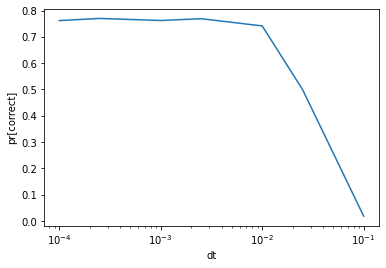

In [7]:
dt_list = [dt for dt in result_by_dt]
nshots = [violated[i] + suboptimal[i] + solution[i] for i in range(len(dt_list))]
pr_list = [solution[i]/nshots[i] for i in range(len(dt_list))]
plt.plot(dt_list, pr_list)
plt.xlabel("dt")
plt.ylabel("pr[correct]")
plt.xscale('log')


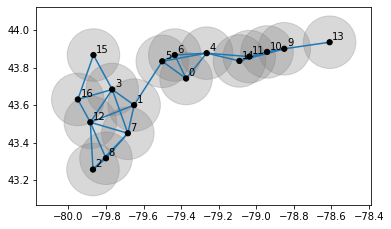

Canada, Near Toronto > 50,000, num_cities = 17
	dt = 0.1 :
		solution   = 181
		violated   = 8696
		suboptimal = 1123
	dt = 0.025 :
		solution   = 4995
		violated   = 2150
		suboptimal = 2855
	dt = 0.01 :
		solution   = 7415
		violated   = 1272
		suboptimal = 1313
	dt = 0.0025 :
		solution   = 7691
		violated   = 1090
		suboptimal = 1219
	dt = 0.001 :
		solution   = 7621
		violated   = 1105
		suboptimal = 1274
	dt = 0.00025 :
		solution   = 7700
		violated   = 986
		suboptimal = 1314
	dt = 0.0001 :
		solution   = 7619
		violated   = 1073
		suboptimal = 1308


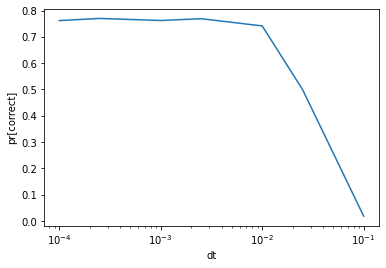

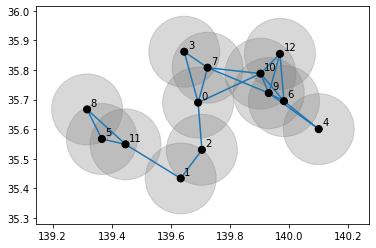

Japan, Near Tokyo > 400,000, num_cities = 13
	dt = 0.1 :
		solution   = 615
		violated   = 7596
		suboptimal = 1789
	dt = 0.025 :
		solution   = 5798
		violated   = 2043
		suboptimal = 2159
	dt = 0.01 :
		solution   = 7926
		violated   = 1118
		suboptimal = 956
	dt = 0.0025 :
		solution   = 8141
		violated   = 984
		suboptimal = 875
	dt = 0.001 :
		solution   = 8221
		violated   = 952
		suboptimal = 827
	dt = 0.00025 :
		solution   = 8184
		violated   = 978
		suboptimal = 838
	dt = 0.0001 :
		solution   = 8199
		violated   = 979
		suboptimal = 822


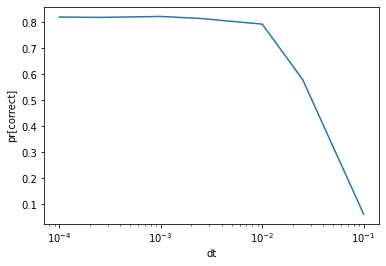

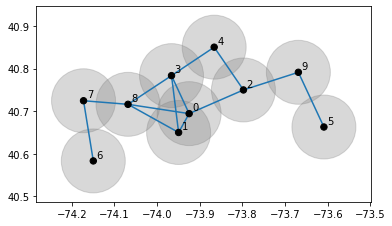

United States, Near New York > 200,000, num_cities = 10
	dt = 0.1 :
		solution   = 990
		violated   = 7682
		suboptimal = 1328
	dt = 0.025 :
		solution   = 6149
		violated   = 1670
		suboptimal = 2181
	dt = 0.01 :
		solution   = 8404
		violated   = 1012
		suboptimal = 584
	dt = 0.0025 :
		solution   = 8523
		violated   = 953
		suboptimal = 524
	dt = 0.001 :
		solution   = 8514
		violated   = 959
		suboptimal = 527
	dt = 0.00025 :
		solution   = 8520
		violated   = 963
		suboptimal = 517
	dt = 0.0001 :
		solution   = 8478
		violated   = 986
		suboptimal = 536


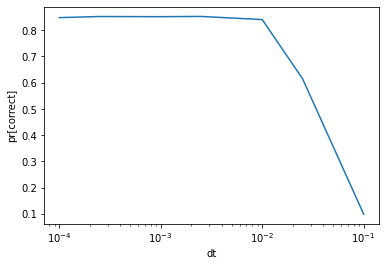

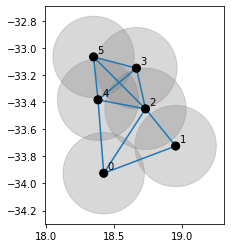

South Africa Near Cape Town > 1,000, num_cities = 6
	dt = 0.1 :
		solution   = 2380
		violated   = 4144
		suboptimal = 3476
	dt = 0.025 :
		solution   = 8109
		violated   = 1225
		suboptimal = 666
	dt = 0.01 :
		solution   = 9062
		violated   = 668
		suboptimal = 270
	dt = 0.0025 :
		solution   = 9216
		violated   = 547
		suboptimal = 237
	dt = 0.001 :
		solution   = 9184
		violated   = 576
		suboptimal = 240
	dt = 0.00025 :
		solution   = 9208
		violated   = 573
		suboptimal = 219
	dt = 0.0001 :
		solution   = 9173
		violated   = 556
		suboptimal = 271


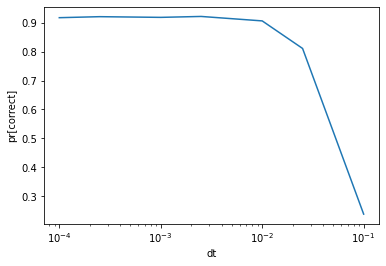

In [8]:
sorted_key = sorted(list(simulation_result.keys()), key=lambda x: len(city_graph[x]['graph']))
pr_correct = dict()
for dataset_name in simulation_result:
    result_by_dt = simulation_result[dataset_name]
    graph = city_graph[dataset_name]['graph']
    radius = city_graph[dataset_name]['radius']
    num_cities = len(graph)
    draw_graph(graph, radius=radius)
    max_finding = 0

    violated = [0 for _ in range(len(result_by_dt))]
    suboptimal = [0 for _ in range(len(result_by_dt))]
    solution = [0 for _ in range(len(result_by_dt))]
    print(f"{dataset_name}, num_cities = {num_cities}")

    for i, dt in enumerate(result_by_dt):
        occurrence = result_by_dt[dt]['occurrence']
        for a in occurrence:
            a_bin = int_to_bin(a, num_cities)
            v, n = sanity_check(graph, radius=radius, answer=a_bin)
            if v > 0:
                violated[i] += occurrence[a]
            elif v == 0 and n > max_finding:
                max_finding = n
                suboptimal[i] += solution[i]
                solution[i] = occurrence[a]
                for j in range(i):
                    suboptimal[j] += solution[j]
                    solution[j] = 0
            elif v == 0 and n < max_finding:
                suboptimal[i] += occurrence[a]
            elif v == 0 and n == max_finding:
                solution[i] += occurrence[a]
            else:
                print("unexpected")
                print(v, n, max_finding)
                raise ValueError

    for i, dt in enumerate(result_by_dt):
        print(f"\tdt = {dt} :")
        print(f"\t\tsolution   = {solution[i]}")
        print(f"\t\tviolated   = {violated[i]}")
        print(f"\t\tsuboptimal = {suboptimal[i]}")

    dt_list = [dt for dt in result_by_dt]
    nshots = [violated[i] + suboptimal[i] + solution[i] for i in range(len(dt_list))]
    pr_list = [solution[i]/nshots[i] for i in range(len(dt_list))]
    pr_correct.update({dataset_name:pr_list})
    plt.plot(dt_list, pr_list)
    plt.xlabel("dt")
    plt.ylabel("pr[correct]")
    plt.xscale('log')
plt.show()

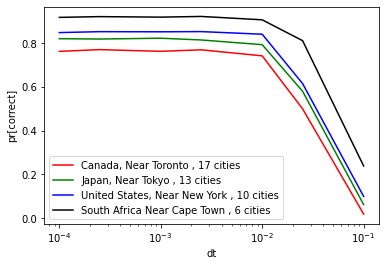

In [14]:
colors = 'rgbk'
for i, dataset_name in enumerate(pr_correct):
    num_cities = len(city_graph[dataset_name]['graph'])
    plt.plot(dt_list, pr_correct[dataset_name], f"{colors[i]}-", label=f"{dataset_name.split('>')[0]}, {num_cities} cities")
plt.xlabel("dt")
plt.ylabel("pr[correct]")
plt.xscale('log')
plt.legend()